In [1]:
import os
from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import tensorflow as tf
import matplotlib.image as mpimg
import random
import os
import pathlib
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing import image_dataset_from_directory
import itertools

In [2]:
train_path = "C:/Users/KIIT/Downloads/Facemask/New_Masks_Dataset/Train"
test_path = "C:/Users/KIIT/Downloads/Facemask/New_Masks_Dataset/Test"
val_path = "C:/Users/KIIT/Downloads/Facemask/New_Masks_Dataset/Validation"

In [3]:
data_dir = "C:/Users/KIIT/Downloads/Facemask/New_Masks_Dataset/Train"
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img 
class_names=os.listdir(data_dir)
print(class_names)

['Mask', 'Non Mask']


Image shape: (217, 232, 3)
Image shape: (413, 619, 3)
Image shape: (433, 650, 3)
Image shape: (621, 658, 3)
Image shape: (960, 768, 3)
Image shape: (455, 444, 3)
Image shape: (720, 1080, 3)
Image shape: (1023, 775, 3)
Image shape: (810, 456, 3)
Image shape: (525, 1000, 3)
Image shape: (359, 242, 3)
Image shape: (731, 1023, 3)
Image shape: (731, 1023, 3)


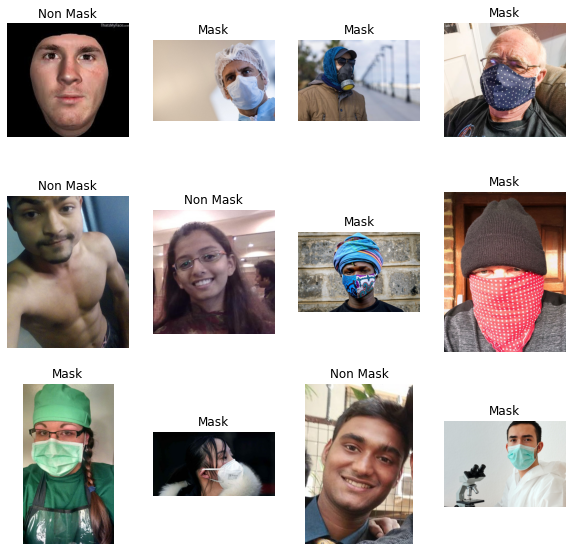

In [4]:
def view_random_image(target_dir, target_class):
    target_folder = target_dir + '/' + target_class
    random_image = random.sample(os.listdir(target_folder), 1)
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");

    print(f"Image shape: {img.shape}")
    return img
import random
plt.figure(figsize=(10,10))
for i in range(12):
    plt.subplot(3,4,i+1)
    r=random.randint(0,1)
    img = view_random_image(data_dir, class_names[r])    
print(f"Image shape: {img.shape}")

In [5]:
# For replicable results
SEED = 0
# Size of the images is (128,128)
IMAGE_SIZE = (224, 224)
# Default batch size
BATCH_SIZE = 32
# Images are grayscale
# 20% test split
VAL_SPLIT = 0.2

tf.random.set_seed(SEED)
np.random.seed(SEED)
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    train_path,
    label_mode='categorical',
    seed=SEED,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
)
valid_data = tf.keras.preprocessing.image_dataset_from_directory(
    val_path,
    label_mode='categorical',
    seed=SEED,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
)
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    test_path,
    label_mode='categorical',
    seed=SEED,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
)

Found 600 files belonging to 2 classes.
Found 306 files belonging to 2 classes.
Found 100 files belonging to 2 classes.


In [6]:
from tensorflow.keras import models,layers 

resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(224,224),
  layers.experimental.preprocessing.Rescaling(1./255),
])

data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
  layers.experimental.preprocessing.RandomZoom(0.2,0.3),

])

train_data = train_data.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [7]:
import keras#DESIGNING THE CNN MODEL
from keras.models import Sequential
from keras.models import Model
from keras import optimizers, losses, activations, models
from keras.layers import Convolution2D, Dense, Input, Flatten, Dropout, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D, Concatenate
from tensorflow.keras import applications

base_model =applications.InceptionV3(weights='imagenet', 
                                include_top=False, 
                                input_shape=(224, 224,3))
base_model.trainable = False
model_Inc = Sequential(resize_and_rescale)
model_Inc.add(base_model)
model_Inc.add(GlobalAveragePooling2D())
model_Inc.add(Dropout(0.5))
model_Inc.add(Dense(64, 
                    activation='linear'))
model_Inc.add(Dense(2, 
                    activation='softmax'))
model_Inc.build(input_shape=(32,224,224,3))

model_Incep = model_Inc
LR = 0.001

model_Incep.compile(loss="categorical_crossentropy", 
                optimizer=tf.keras.optimizers.Adam(learning_rate=LR), 
                metrics=["accuracy"])

In [8]:
model_Incep.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 224, 224, 3)         0         
                                                                 
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 global_average_pooling2d (G  (32, 2048)               0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (32, 2048)                0         
                                                                 
 dense (Dense)               (32, 64)                  131136    
                                                                 
 dense_1 (Dense)             (32, 2)                   130       
                                                      

In [9]:
import tensorflow as tf
tf.keras.utils.plot_model(model_Incep,to_file='model_Incep.png',show_shapes=True,show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [10]:
EPOCHS = 15 #TRAINING THE MODEL
history = model_Incep.fit(train_data,
                      validation_data=valid_data,
                      epochs=EPOCHS,
                      verbose=True
                      )

Epoch 1/15
19/19 [==============================] - 64s 3s/step - loss: 1.0588 - accuracy: 0.7300 - val_loss: 0.0969 - val_accuracy: 0.9608
Epoch 2/15
19/19 [==============================] - 59s 3s/step - loss: 0.2660 - accuracy: 0.9200 - val_loss: 0.0977 - val_accuracy: 0.9641
Epoch 3/15
19/19 [==============================] - 61s 3s/step - loss: 0.1828 - accuracy: 0.9300 - val_loss: 0.1358 - val_accuracy: 0.9542
Epoch 4/15
19/19 [==============================] - 59s 3s/step - loss: 0.2325 - accuracy: 0.9317 - val_loss: 0.1664 - val_accuracy: 0.9346
Epoch 5/15
19/19 [==============================] - 59s 3s/step - loss: 0.2266 - accuracy: 0.9183 - val_loss: 0.0931 - val_accuracy: 0.9641
Epoch 6/15
19/19 [==============================] - 60s 3s/step - loss: 0.1600 - accuracy: 0.9517 - val_loss: 0.0932 - val_accuracy: 0.9608
Epoch 7/15
19/19 [==============================] - 57s 3s/step - loss: 0.1986 - accuracy: 0.9433 - val_loss: 0.1018 - val_accuracy: 0.9575
Epoch 8/15
19/19 [==

In [11]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,1.058827,0.730000,0.096947,0.960784
1,0.265951,0.920000,0.097739,0.964052
2,0.182756,0.930000,0.135792,0.954248
3,0.232506,0.931667,0.166408,0.934641
4,0.226594,0.918333,0.093145,0.964052
5,0.159990,0.951667,0.093193,0.960784
6,0.198598,0.943333,0.101775,0.957516
7,0.185059,0.946667,0.563195,0.836601
8,0.359352,0.903333,0.086464,0.964052
9,0.194184,0.948333,0.128068,0.947712


Text(0.5, 1.0, 'Accuracy')

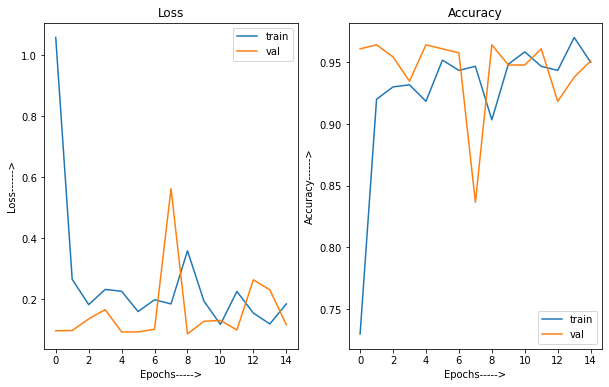

In [12]:
# Graph for Loss and Accuracy

df=pd.DataFrame(history.history)
plt.figure(figsize=(10,6))
plt.subplot(1, 2, 1)
plt.plot(df[['loss','val_loss']])
plt.xlabel("Epochs----->")
plt.ylabel("Loss------>")
plt.legend(['train','val'])
plt.title("Loss")
plt.subplot(1,2,2)
plt.plot(df[['accuracy','val_accuracy']])
plt.xlabel("Epochs----->")
plt.ylabel("Accuracy------>")
plt.legend(['train','val'])
plt.title("Accuracy")

In [13]:
model_Incep.evaluate(test_data)

4/4 [==============================] - 6s 1s/step - loss: 0.0574 - accuracy: 0.9900


[0.05743568390607834, 0.9900000095367432]

In [14]:
y_pred=[]
y_actual=[]
for images , labels in test_data:
    label=np.array(labels)
    pred=model_Incep.predict(images)
    for i in pred:
      y_pred.append(np.argmax(i))
    for i in label: 
      y_actual.append(np.argmax(i))

1/1 [==============================] - 1s 1s/step


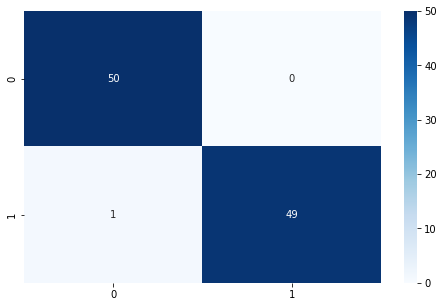

In [15]:
# Confusion matrix
#visualisation for False positive and false negative 

from sklearn.metrics import confusion_matrix
conf_mat=confusion_matrix(y_actual,y_pred)
import seaborn as sns
plt.figure(figsize=(8,5))
sns.heatmap(conf_mat,annot=True,cmap="Blues")

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_actual,y_pred,target_names=class_names))

              precision    recall  f1-score   support

        Mask       0.98      1.00      0.99        50
    Non Mask       1.00      0.98      0.99        50

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100

